# Customer Churn Analysis for a Subscription-Based Streaming Platform
 
This project analyzes customer churn for a subscription-based streaming platform to unerstand why the customers stop using the service, the key churn drivers and data based recommendations to retain users

# Business Overview:

Subscription based streaming platforms rely on recurring monthly subscription making customer retention the most important aspect for business performance. Customer churn occurs when users discontinue the subscription or stop using the product. Even a small increse in customer churn can have a huge impact on the revenue and business sustainability.

The dataset consists of customer level information including customer behaviour (watch hours, number of profiles),subscription types, customer demographics (age, gender, region). The analysis focuses on seeing comparing patterns based on these attributes for active and churned users to draw insights on key churn drivers and generated recommendation to retain customers and reduce churn rate.

# Data Understanding and Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(style='whitegrid')

In [3]:
df=pd.read_csv("netflix_customer_churn.csv")

In [4]:
df.shape

(5000, 14)

In [5]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [6]:
df.columns

Index(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='object')

In [7]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [9]:
df.dtypes

customer_id                object
age                         int64
gender                     object
subscription_type          object
watch_hours               float64
last_login_days             int64
region                     object
device                     object
monthly_fee               float64
churned                     int64
payment_method             object
number_of_profiles          int64
avg_watch_time_per_day    float64
favorite_genre             object
dtype: object

In [10]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

 No Missing values were found

In [11]:
df.duplicated().sum()

0

 No Duplicated rows were found

In [12]:
df=df.drop('customer_id',axis=1)

Column named 'customer_id' was deleted from the table since it does not have any analytical and predictive use

In [13]:
df['churned'].value_counts()

1    2515
0    2485
Name: churned, dtype: int64

0 indicates customer is still active
1 indicates customer has cancelled its subscription

In [14]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [15]:
df['churn_status']=df['churned'].apply(lambda x: 'Active' if x==0 else 'Churned')

In [16]:
df['churn_status'].value_counts()

Churned    2515
Active     2485
Name: churn_status, dtype: int64

In [17]:
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre',
       'churn_status'],
      dtype='object')

# Categorizing columns:

**Target Variable**
- churn_status / churned

**Customer behavior**

- watch_hours
- avg_watch_time_per_day
- last_login_days
- number_of_profiles

**Subscription & revenue**

- sbscription_type
- monthly_fee
- payment_method

**Customer attributes**

- age
- gender
- region
- devicefavorite_genre

# Exploratory Data Analysis

**Univariate Analysis**

This analysis was performed to understand the distribution and characteristics of individual features before analyzing their relationship with churn

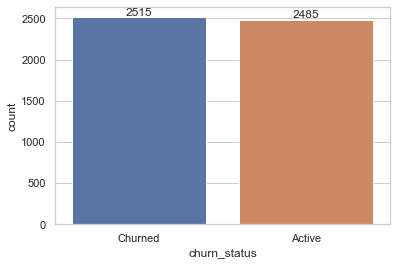

In [18]:
ax=sns.countplot(x='churn_status',data=df)
for b in ax.containers:
    ax.bar_label(b)

**Insight:**
The distribution of churned users and active users is nearly the same indicating high churn rate and immediate rectfying actions

Text(0.5, 1.0, 'Distribution of Customer Age')

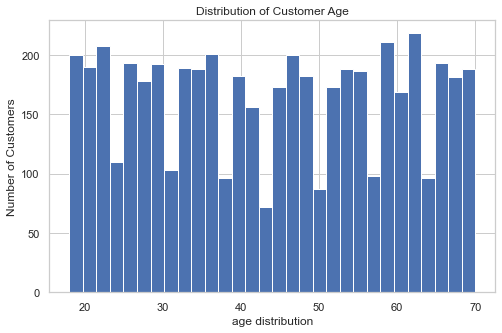

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df['age'],bins=30)
plt.xlabel("age distribution")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Age")

**Insight:** Users are spread almost even across all age groups suggesting no concentration users in a specific age group

Text(0.5, 1.0, 'Distribution of Watch Hours')

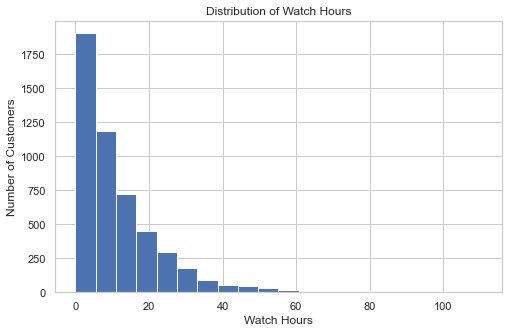

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df["watch_hours"], bins=20)
plt.xlabel("Watch Hours")
plt.ylabel("Number of Customers")
plt.title("Distribution of Watch Hours")

**Insight:** Majority of users spend relatively few hours on the platform whereas only a small portion showing high usage

Text(0.5, 1.0, 'Watch Hours')

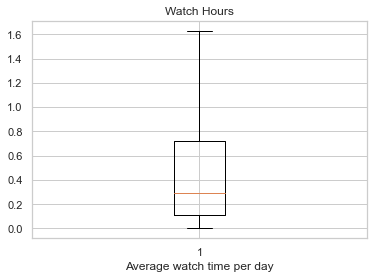

In [21]:
plt.figure(figsize=(6,4))
plt.boxplot(df['avg_watch_time_per_day'],showfliers=False)
plt.xlabel("Average watch time per day")
plt.title("Watch Hours")

**Insight:** Most customers spend less time watching content per day with average watch time only 30 minutes, only a small portion spend long hours with maximum being ~ 96 minutes

Text(0.5, 1.0, 'Distribution of Last Login Days')

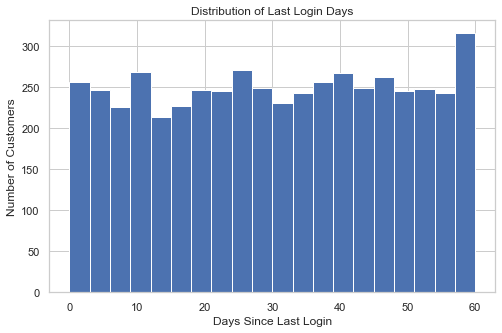

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df["last_login_days"], bins=20)
plt.xlabel("Days Since Last Login")
plt.ylabel("Number of Customers")
plt.title("Distribution of Last Login Days")

**Insight:** Customers exhibit a broad range of inactivity levels suggesting a mix of regularly active and infrequent users

Text(0.5, 1.0, 'Customer Distribution Across Monthly Subscription Fees')

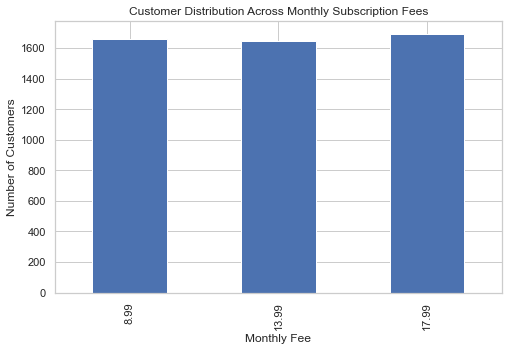

In [23]:
plt.figure(figsize=(8,5))
df['monthly_fee'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Monthly Fee")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution Across Monthly Subscription Fees")

**Insights:** The platform provides multiple subscription plans that seem to be equally subscribed by the users

**Bivariate Analysis**

It is performed to identify the differences between active and churned users based on different column features and see patterns and identify key attributes leading to churn

Text(0, 0.5, 'Watch Hours')

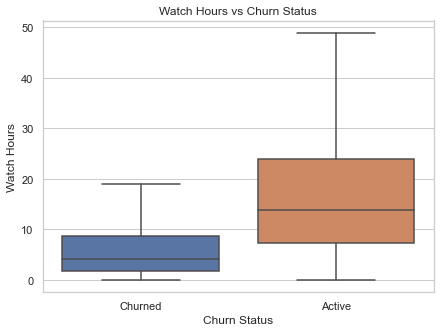

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(x="churn_status", y="watch_hours", data=df,showfliers=False)
plt.title("Watch Hours vs Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Watch Hours")


**Insights:** Churned users spent on average less time the active users on the platform. This indicates that low watch hours increases the probability of churn

Text(0, 0.5, 'Avg Watch Time per Day')

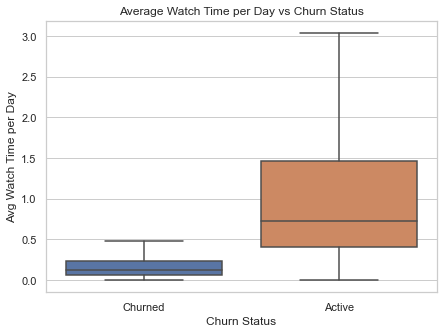

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x="churn_status", y="avg_watch_time_per_day", data=df,showfliers=False)
plt.title("Average Watch Time per Day vs Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Avg Watch Time per Day")

**Insights:** Average daily watch time is significantly higher for active users compared to churned users, this indicates that customer retention depends on keeping the users engaged on a daily basis

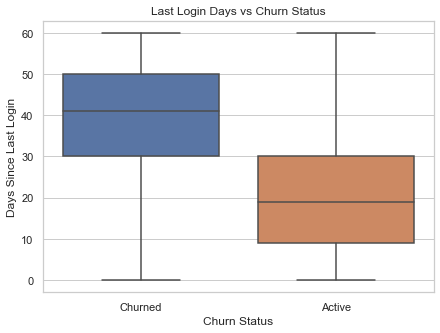

In [26]:
plt.figure(figsize=(7,5))
sns.boxplot(x="churn_status", y="last_login_days", data=df)
plt.title("Last Login Days vs Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Days Since Last Login")
plt.show()


**Insights:** Churned users have higher days since last login than active users. inactivity over days could be deciding factor for discontinuing subscription

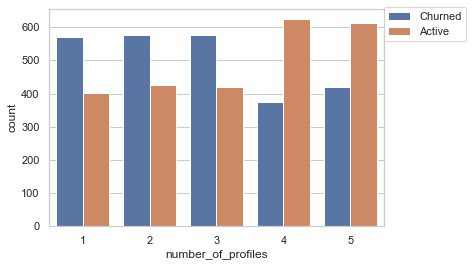

In [27]:
sns.countplot(x="number_of_profiles",data=df,hue='churn_status')
plt.legend(loc=(1,0.85))

**Insights:** users with only one profile show the highest churn whereas when sharing with multiple users specifically 4 or 5 people the churn rate significantly falls

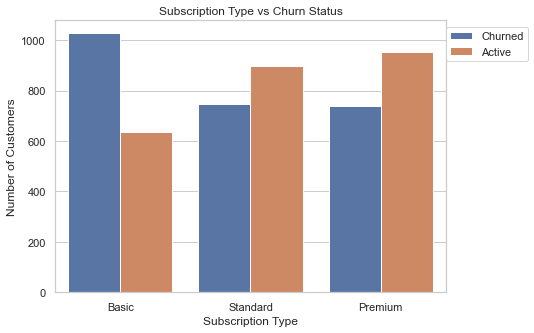

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x="subscription_type",data=df,hue="churn_status")
plt.title("Subscription Type vs Churn Status")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Customers")
plt.legend(loc=(1,0.85))

**Insights:** Users with Basic subscription plan show higher churn than the ones with Standard and Premium subscription. Higher tier subscription plans users show higher retention

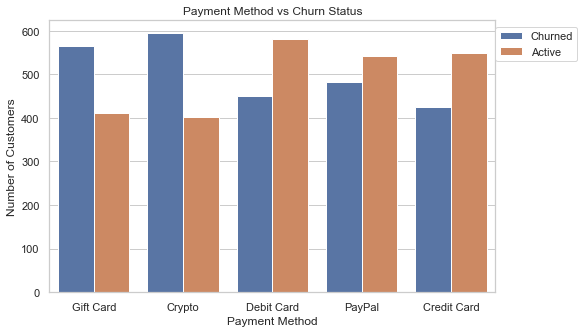

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="payment_method",data=df,hue="churn_status")
plt.title("Payment Method vs Churn Status")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.legend(loc=(1,0.85))

**Insights:** Based on payment methods, non-traditional payment methods: gift card and crypto show higher churn than card or online payment(PayPal) methods

Text(0, 0.5, 'Age')

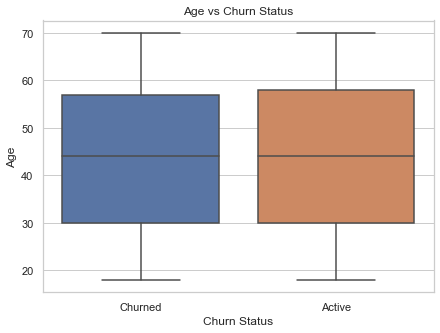

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x="churn_status",y="age",data=df,showfliers=False)
plt.title("Age vs Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Age")

**Insights:** Age distribution is similar for churned and active users indicating that age is not a factor of that affects churn

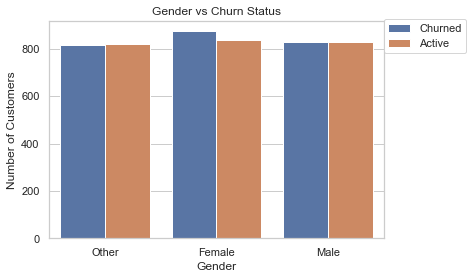

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender",data=df,hue="churn_status")
plt.title("Gender vs Churn Status")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(loc=(1,0.85))

**Insights:** Gender does not play a key role in identiying customers with a higher chance of discontinuing. Yet it could be inferred that females exhibit slightly higher churn behavior

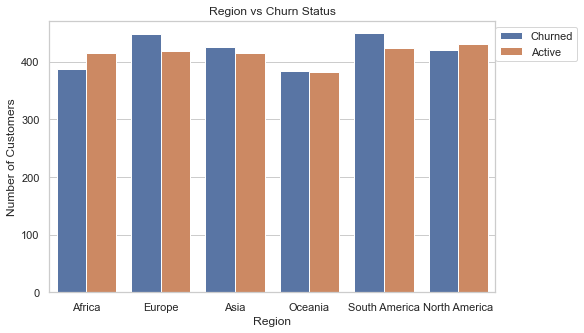

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x="region",data=df,hue="churn_status")
plt.title("Region vs Churn Status")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.legend(loc=(1,0.85))

**Insights:** Customer churn does not vary a lot by the  region, suggesting that customer retention plans should be the same globally and not region specific

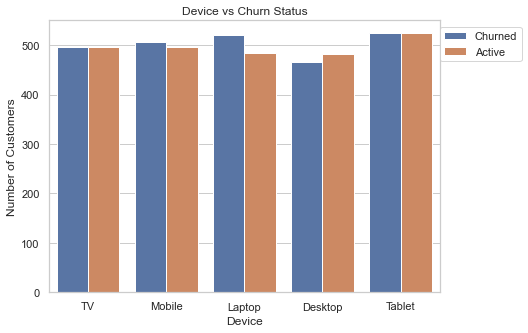

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(x="device",data=df,hue="churn_status")
plt.title("Device vs Churn Status")
plt.xlabel("Device")
plt.ylabel("Number of Customers")
plt.legend(loc=(1,0.85))

**Insights:** No single device category shows meaningful difference in churned and active users indicating that device cateory is not a factor of churn levels

Text(0.5, 1.0, 'Distribution of Last Login Days')

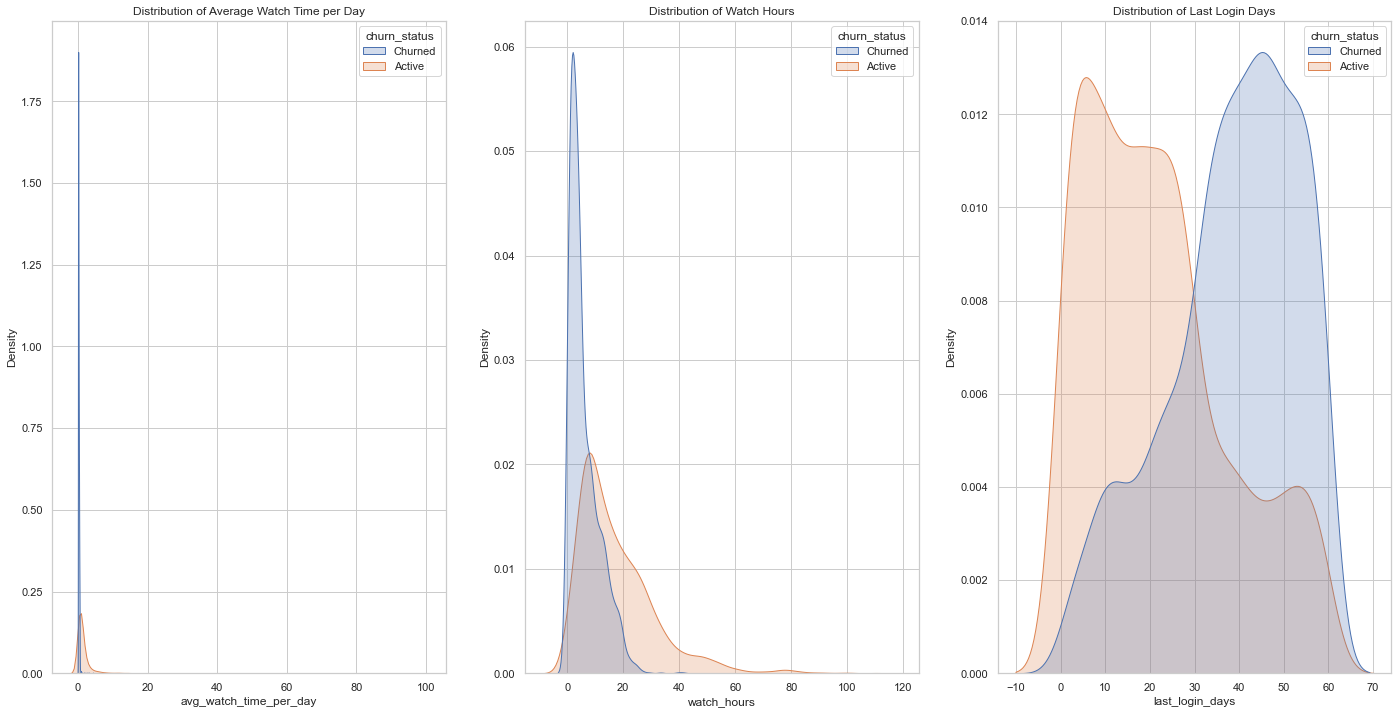

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(24, 12))


sns.kdeplot(data=df,x="avg_watch_time_per_day",hue="churn_status",fill=True,ax=axes[0])
axes[0].set_title("Distribution of Average Watch Time per Day")

sns.kdeplot(data=df,x="watch_hours",hue="churn_status",fill=True,ax=axes[1])
axes[1].set_title("Distribution of Watch Hours")

sns.kdeplot(data=df,x="last_login_days",hue="churn_status",fill=True,ax=axes[2])
axes[2].set_title("Distribution of Last Login Days")



**Insights:** Across the watch time metrics, churned users show higher inactivity and lower engagement compared to the active users

# Calculating Overall Churn Rate

In [35]:
churn_rate = df["churned"].mean() * 100
churn_rate


50.3

The overall churn rate is 50.3%, indicating that approximately half of the customers in the dataset have discontinued the service.

# Predictive Modeling (Logistic Regression)

In [36]:
X = df.drop(columns=["churned", "churn_status"])
y = df["churned"]


In [37]:
X = pd.get_dummies(X, drop_first=True)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [41]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.897

**Insights:** An accuracy of ~90% shows that the model can reliably identify users who are at risk of discontinuingthe service 

In [42]:
feature_importance = pd.DataFrame({"feature": X.columns,"coefficient": model.coef_[0]
                                  }).sort_values(by="coefficient", ascending=False)

feature_importance.head(10)


,feature,coefficient
2,last_login_days,2.319862
21,payment_method_Gift Card,0.639173
19,payment_method_Crypto,0.601972
15,device_Laptop,0.112280
25,favorite_genre_Drama,0.103955
14,region_South America,0.081388
18,device_Tablet,0.061200
16,device_Mobile,0.059738
17,device_TV,0.057666
13,region_Oceania,0.050048


**Insights:** 
- user inactivity is the strongest predictor of churn, indicating that users with longer periods of last login days are more likely to discontinue from the service
- Users with non - Traditional Payment methods like gift cards and crypto show low commitments to subscriptions
- Demographic attributes like region and device type are poorer predictors of customer churn

**Key Insights**
- Days since inactivity and non-traditional payment methods are the key predictive metrics for user churn
- Churned users show much lower watch hours and watch time per day
- When users share an account they are more likely to continue with their subscription
- Similarily, Users with higher tier plans are more likely to be retained compared to basic plan users
- Age, Gender, Device and Region distrubution show negligible variance in user churn and active users meaning these are paradoxially not useful to determine which users could churn 
- Based on time related metrics, churned users show lower activity and engagement relative to active users

**Recommendations**
- Improve activity by pushing more curated notifications and emails based on user past preferred content
- Coax users to shift from card and crypto payment methods to  auto-renewing card and online payments
- Promote upgrade to higher tiered subscription plans especially the premium plan
- Promote sharing of accounts as opposed to single user accounts
- focus more on time and engagement related metrics rather demographic categories like age, gender, device and region


**Conclusion**

Improving user inactivity and focusing on user in-app engagement and promoting auto renewing card payments are the most effective methods to retaing users and prevent churn